# **Home Work Assignment #14**
                                                                                
## ***Correcting Emission Lines For Reddening***

##### Author : Spencer Long  
##### Class: Astro 320 Spectroscopy

---
---
---

# *Imports*

In [117]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from astropy.io import fits
from astropy import units as u

plt.style.use('ggplot')

---
# *Accessing Fits File Data*

In [101]:
hdul = fits.open('/Users/Spencer/Desktop/Spectroscopy320/Spectra_Data/7.G0_star.fits')

In [102]:
manual = hdul[0].header # Assgining variable to call header data of fits file

In [103]:
data = hdul[0].data # Storing Flux density data into memory (will be used for our y axis)

(7624,)


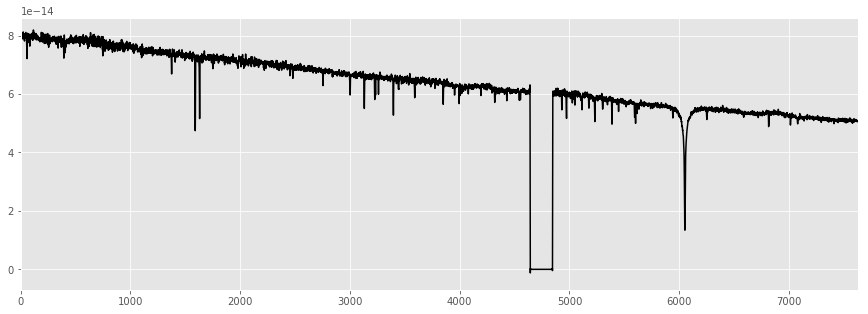

In [118]:
print(data.shape)

# Plotting flux data to take a quick look.

plt.figure(figsize=(15,5))
plt.xlim(data[0],len(data))
plt.ylim(-.7e-14,8.6e-14)
plt.plot(data, color = 'black') 

---

# *Creating The X Axis*

##### To calculate the proper x axis in which it was measured we need to find the so called shift of the x axis...

The shift is $crpix_1$ $\cdot$ $cdelt_1$ where crpix is the reference pixel value in angstroms and cdelt is the step size in angstroms per data point

In [105]:
import math
t = manual['CDELT1']
t

0.15085924176833

In [106]:
shift_x = manual['CRPIX1']*manual['CDELT1']
shift_x

0.15085924176833

In [107]:
manual['CRVAL1']

5650.0

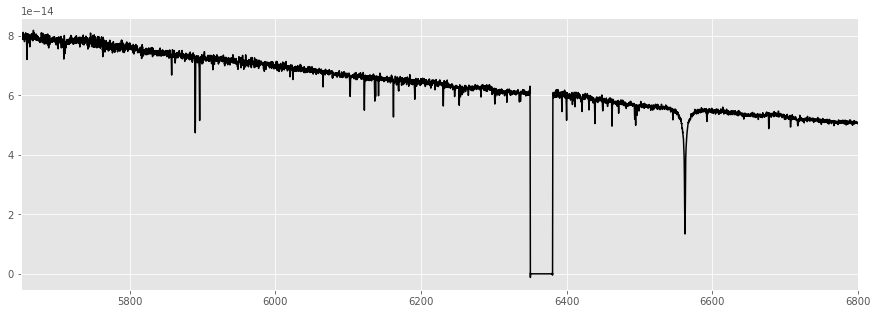

In [109]:
#np.arange(hdul[0].header['CRVAL1']-shift, data.shape[0]*hdul[0].header['CDELT1']+hdul[0].header['CRVAL1']-shift, hdul[0].header['CDELT1'])

x = np.arange(5650-shift_x,len(data) * t+5650-shift_x,t)

plt.figure(figsize = (15, 5))
plt.xlim(x[0],x[-1])
plt.plot(x, data, color = 'black')

---
# *Identifying Required Lines:*

### Labels & Wavelengths Of Lines:

In [57]:
# line labels for plots and dataframe
# NaI lambda obtained from Pg. 44 from class text
lines = [r'$[NaI] \lambda 5890$']
         
# Wavelengths for lines in angstroms
wl = [5890.01]  

### Identifying Lines On The Spectrum:

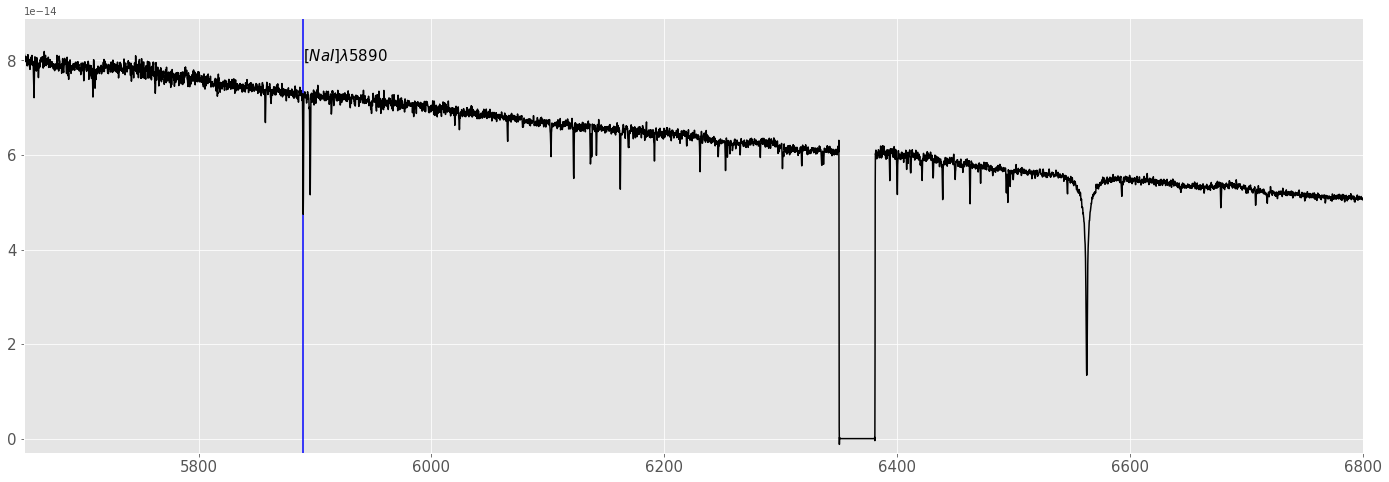

In [111]:
plt.figure(figsize=(24,8))

plt.axvline(x = wl[0], color = 'blue', ls='-')
plt.annotate(lines[0], xy=(wl[0],8.0e-14), xytext=(wl[0],8.0e-14), fontsize=15)

plt.ylim(-.3e-14,8.9e-14)
plt.xlim(x[0],x[-1])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(x,data, color = 'black')
plt.show()

### Taking A Closer Look: 

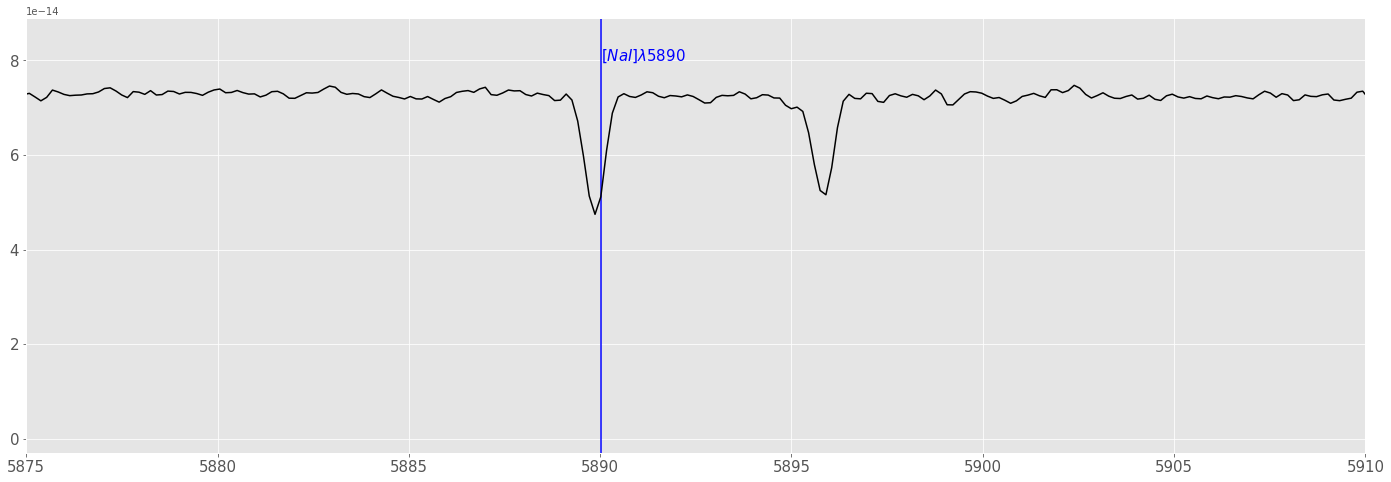

In [121]:
# Zooming in on the NaI region

plt.figure(figsize=(24,8))

plt.axvline(x = wl[0], color = 'blue', ls='-')
plt.annotate(lines[0], xy=(wl[0],8.0e-14), xytext=(wl[0],8.0e-14), fontsize=15, color = 'blue')

plt.ylim(-.3e-14,8.9e-14)
plt.xlim(5875,5910)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(x,data, color = 'black')
plt.show()

# *Part a.*
# *Measuring The Wavelength & Equivalent Width of Na I D2:* 

**Note:** Measurements were made using a Gaussian fit with splot from the library Pyraf.

$\lambda=5890A^o$  
Center $\lambda_{measured}=5890.01A^o$  
Flux $=1.6$E$-14$  
Equivalent Width $=0.2215A^o$

---
# *Part b.* 
# *Finding Einstein Coefficients & Statistical Weights For Na I D2:*

**Source for Einstein Coefficient:** https://physics.nist.gov/PhysRefData/ASD/lines_form.html

Orbital angular momentum vector L=0   
Spin angular momentum vector S=1/2  
Einstein Coefficient $A_{21}=6.16$E$+07$  

**Upper Energy Level:** J=3/2

$g_2 = 2J+1 = 2(3/2)+1 = 4$

**Lower Energy Level:** J=1/2

$g_1 = 2J+1 = 2(1/2)+1 = 2$

---
# *Part c.*
# *Calculating The Oscillator Strength $(f_{12})$:*
#### Equation 6.21 From Text:

$ f_{12} = 1.499 $ X $ 10^{-16} \cdot \lambda^2 \cdot \frac{g_2}{g_1} \cdot A_{21} $

In [127]:
f_12 = 1.499 * 10**-16  * 5890**2 * (4/2) * 6.16e07
f_12

0.6406826013279999

---
# *Part d.*
# *Column Density of Na I Atoms Along Our Line of Sight to The G0 Star:*

$N(cm^{-2}) = \frac{1.13X10^{20}}{f_{12}} \cdot \frac{W_{\lambda}}{\lambda^2}$

In [135]:
(1.13*10**20/f_12) * ((2.215e-9)/((5.89e-5)**2)) * u.cm**-2

<Quantity 1.1261044e+20 1 / cm2>